In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import pandas_profiling as pdp
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.cluster import dbscan
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from kneed import KneeLocator

# Loading the dataset

In [2]:
df=pd.DataFrame(pd.read_csv("segmentationdata.csv"))
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


ID	numerical	Integer	Shows a unique identificator of a customer.
			
Sex	categorical	{0,1}	Biological sex (gender) of a customer. In this dataset there are only 2 different options.
		0	male
		1	female
			
Marital status	categorical	{0,1}	Marital status of a customer.
		0	single
		1	non-single (divorced / separated / married / widowed)
			
Age	numerical	Integer	The age of the customer in years, calculated as current year minus the year of birth of the customer at the time of creation of the dataset
		18	Min value (the lowest age observed in the dataset)
		76	Max value (the highest age observed in the dataset)
			
Education	categorical	{0,1,2,3}	Level of education of the customer
		0	other / unknown
		1	high school
		2	university
		3	graduate school
			
Income	numerical	Real	Self-reported annual income in US dollars of the customer.
		35832	Min value (the lowest income observed in the dataset)
		309364	Max value (the highest income observed in the dataset)
			
Occupation	categorical	{0,1,2}	Category of occupation of the customer.
		0	unemployed / unskilled
		1	skilled employee / official
		2	management / self-employed / highly qualified employee / officer
			
Settlement size	categorical	{0,1,2}	The size of the city that the customer lives in.
		0	small city
		1	mid-sized city
		2	big city


In [3]:
df.drop('ID',axis=1,inplace=True)
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0
1996,1,1,27,1,117744,1,0
1997,0,0,31,0,86400,0,0
1998,1,1,24,1,97968,0,0


In [4]:
# این فانکشن برای آن است که ما عنوان ستون ، تایپ آن و داده های یونیک و میزان میسینگ ولیو را مشاهده کنیم

def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 
check(df)

,column,dtypes,nunique,sum_null
0,Sex,int64,2,0
1,Marital status,int64,2,0
2,Age,int64,58,0
3,Education,int64,4,0
4,Income,int64,1982,0
5,Occupation,int64,3,0
6,Settlement size,int64,3,0


In [5]:
#این برای گرفتن یه شماتیک کلی از داده های خود هست
temp = df.describe()
temp.style.background_gradient(cmap='Oranges')

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.038000,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.599780,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.000000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.000000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.000000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.000000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.000000,309364.000000,2.000000,2.000000


# EDA

In [6]:
cat_columns=['Sex','Marital status','Education','Occupation','Settlement size']
num_columns=['Age','Income']


In [7]:
plt.style.use('fivethirtyeight')
def fig (df,var):
    fig2 = px.histogram(df,x=var,color=var,template='plotly_dark')
    fig2.show()

In [8]:
for i in cat_columns:
    fig (df,i)

خب با توجه به نمودار های بالا تا اینجا متوجه شدیم نسبت مشتریان آقا نسبت به خانوم ها بیشتر است
همچنین وضعیت تاهل مشتریان مجرد بسیار زیاد است و برابری میکند با جمع مشتریان متاهل یا مطلقه و ... 
در ادامه هم بیشتر مشتریان دارای تحصیلات دبیرستانی هستند که تقریبا نشان میدهد جوانان بیشترین مشتری این فروشگاه هستند.
همچنین موقعیت شغلی مشتریان بیشتر کارمندان هستند که در شهرهای موچک زندگی میکنند


Well, according to the graphs above, we have noticed that the proportion of male customers is higher than female customers
Also, the marital status of single customers is very high and is equal to the total number of married or divorced customers and...
Furthermore, most of the customers have high school education, which almost shows that young people are the most customers of this store.
Also, the job position of most of the clients are employees who live in Mochek cities

In [9]:
for i in num_columns:
    fig = px.histogram(df, 
                   x=i, 
                   marginal='box', 
                   text_auto=True,
                   color_discrete_sequence  = ['lightblue'],
                   template='simple_white',
                   title=i.upper() + ' Histogram')

    fig.update_layout(xaxis_title=i,yaxis_title="Count", bargap=0.1)
    
    fig.show()

c:\Users\Mahdi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\Users\Mahdi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



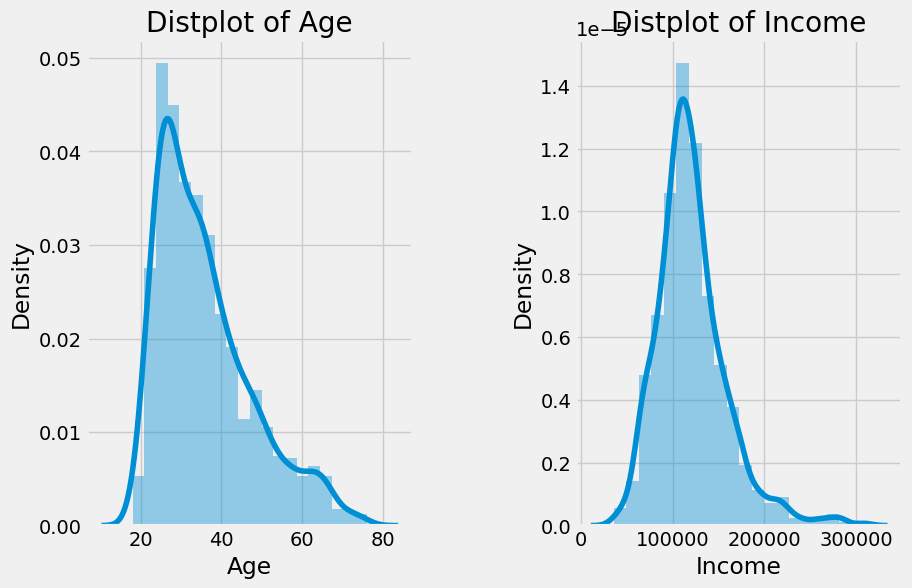

In [10]:
plt.style.use('fivethirtyeight')
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in num_columns:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

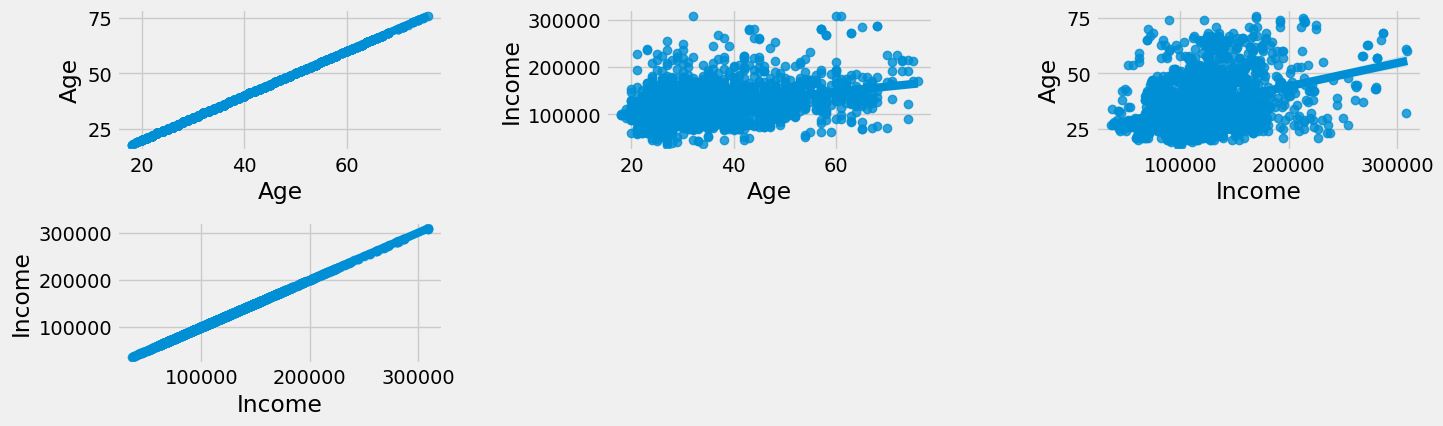

In [11]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in num_columns:
    for y in num_columns:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

In [12]:
sc=StandardScaler()
X=sc.fit_transform(df)

In [13]:
list=[]
for k in range (2,20):
    model = KMeans(n_clusters=k,n_init=10,init='k-means++',max_iter=300,random_state=42)
    model.fit(X)
    list.append(model.inertia_)
list

[10514.558847734452,
 8630.913216898229,
 7169.870822465842,
 6403.134167928612,
 5830.956302961158,
 5378.854705323014,
 5005.134609766623,
 4724.527779695853,
 4295.656622405144,
 4014.943098574837,
 3753.862523880998,
 3551.370078521704,
 3336.440264455832,
 3185.421660571242,
 3070.943421878319,
 2922.7201821665767,
 2738.0240794917536,
 2701.8209499112318]

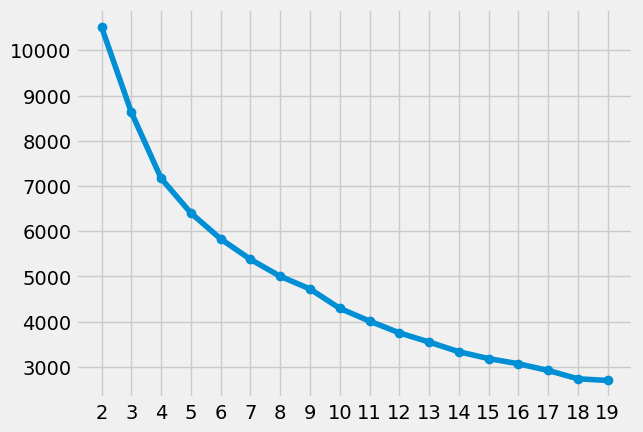

In [14]:
plt.plot(range(2,20),list, marker= 'o')
plt.xticks(range(2,20))
plt.show()

In [15]:
kl=KneeLocator(range(2,20),list,curve='convex',direction='decreasing')
print ('The best K for your KMean is :',kl.elbow)

The best K for your KMean is : 6


In [16]:
list1=[]
for k in range (2,20):
    model = KMeans(n_clusters=k,n_init=10,init='k-means++',max_iter=300,random_state=42)
    model.fit(X)
    score=silhouette_score(X,model.labels_)
    list1.append(score)
list1

[0.2496082794803034,
 0.27177060998494357,
 0.26879180394522123,
 0.2540800397305643,
 0.2630752333415311,
 0.26659241496996416,
 0.2781577892481291,
 0.2889061737883129,
 0.31388535770350495,
 0.3201659473334595,
 0.31625999212386074,
 0.3249358257953022,
 0.33727883343369797,
 0.34759465251414157,
 0.34524099954356213,
 0.3556148918530936,
 0.36906849224088956,
 0.3600033968640308]

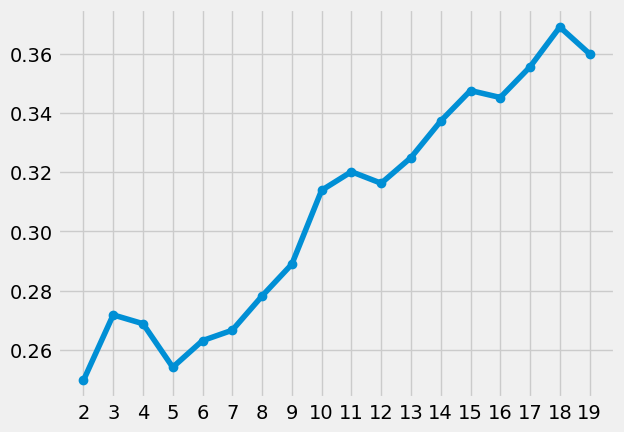

In [17]:
plt.plot(range(2,20),list1, marker= 'o')
plt.xticks(range(2,20))
plt.show()

In [18]:
list2=[]
for k in range (2,20):
    model = KMeans(n_clusters=k,n_init=10,init='k-means++',max_iter=300,random_state=42)
    model.fit(X)
    score=calinski_harabasz_score(X,model.labels_)
    list2.append(score)
list2

[662.3272675473671,
 621.1432114079042,
 633.8067623962023,
 591.7316011779471,
 558.7101767037202,
 532.3916060695879,
 511.4111594344855,
 488.61897518687056,
 499.51342377602583,
 494.6590197999158,
 493.2936329626737,
 487.1694396560787,
 488.264044591406,
 481.36569595616527,
 470.71850073857803,
 469.73034770814843,
 479.54797342053746,
 460.2182732221802]

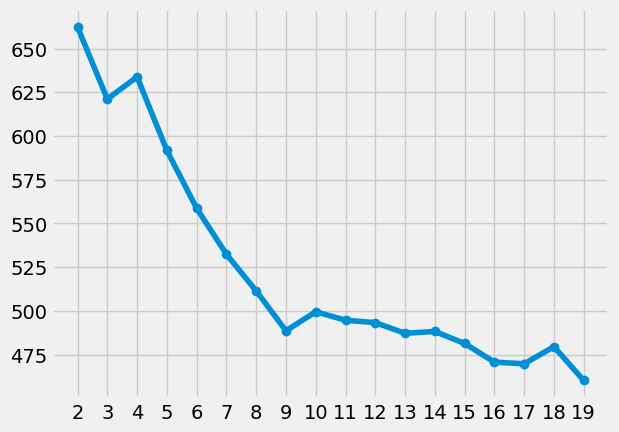

In [19]:
plt.plot(range(2,20),list2, marker= 'o')
plt.xticks(range(2,20))
plt.show()